<a href="https://colab.research.google.com/github/qiubokuan/C-tutorial/blob/main/svm_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [51]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
X0, X1 = X[:,0],X[:,1]

print(X0, X1)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9] [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2

In [52]:
def make_meshgrid(x, y, h=0.02):
  """Create a mesh grid data to plot contourt
  Params:
  x: data for x-axis
  y: data for y-axis
  h: step size
  Return:
  xx,yy: mesh grid data
  """
  x_min,x_max = x.min()-1,x.max()+1
  y_min,y_max = y.min()-1,y.max()+1
  xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy

In [53]:
xx,yy = make_meshgrid(X0,X1)
print(xx)

[[3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 ...
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]]


In [54]:
def plot_contours(ax,clf,xx,yy,**params):
  """plot decision boundaries of a classifier
  Params:
  ax: matplotlib ares object
  clf: classifier
  xx: mesh grid data for x-axis
  yy: mesh grid data for y-axis
  params: dictionary of contourf
  """
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
  return ax.contourf(xx,yy,Z,**params)

In [55]:
C= 1.0
models =(svm.LinearSVC(C=C),
  svm.SVC(kernel='linear',C=C),
  svm.SVC(kernel='poly',degree=3,C=C),
  svm.SVC(kernel='rbf',gamma=0.7,C=C),
)
models =(clf.fit(X,y) for clf in models)

In [56]:
titles =(
  'LinearSVC',
  'SVC with linear',
  'SVC with poly',
  'SVC with rbf'
)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


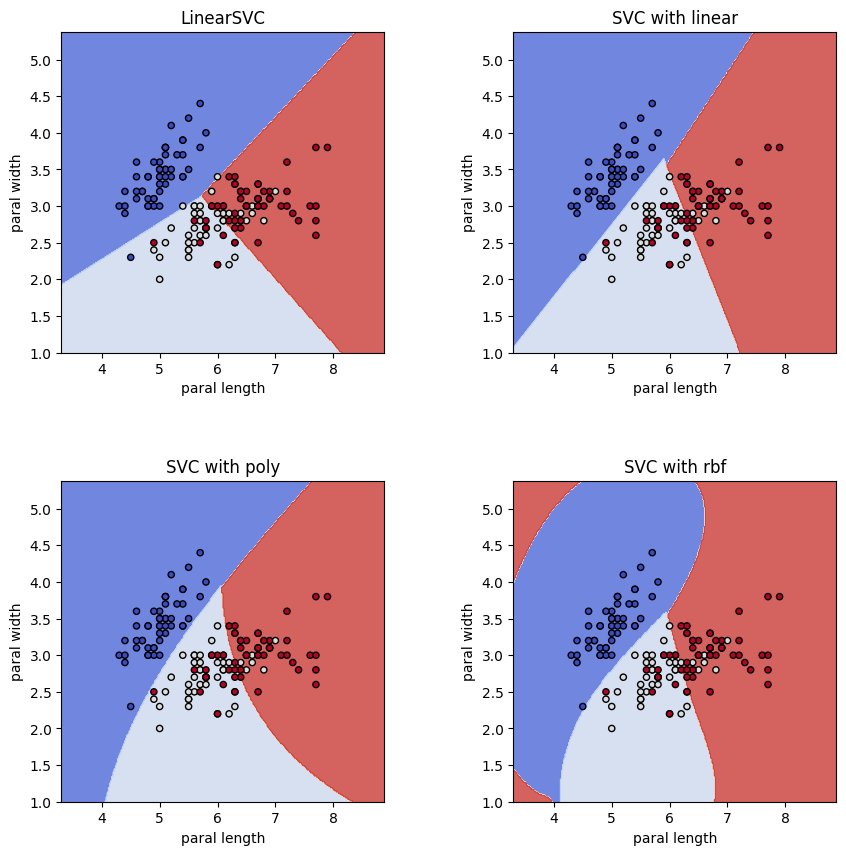

In [57]:
fig,sub = plt.subplots(2,2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4,hspace=0.4)
for clf,ax,title in zip(models,sub.flatten(),titles):
  plot_contours(ax,clf,xx,yy,cmap=plt.cm.coolwarm,alpha=0.8)
  ax.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm,s=20,edgecolor='k')
  ax.set_title(title)
  ax.set_xlabel('paral length')
  ax.set_ylabel('paral width')
plt.show()